In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
train = pd.read_csv("train.csv")  
test = pd.read_csv("test.csv")    
gender_submission = pd.read_csv("gender_submission.csv") 

In [38]:
train.head()  
train.info()  
train.describe()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
print(train.columns) 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [16]:
if 'Cabin' in train.columns:
    train = train.drop('Cabin', axis=1)

In [18]:
train['Title'] = train['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

In [42]:
import pandas as pd
import numpy as np


train = pd.read_csv("train.csv")


if 'Cabin' in train.columns:
    train = train.drop('Cabin', axis=1)  # Only drop if exists


train['Age'] = train['Age'].fillna(train['Age'].median())


train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])


train['Title'] = train['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)


title_replacements = {
    'Lady': 'Rare', 'Countess': 'Rare', 'Capt': 'Rare', 'Col': 'Rare',
    'Don': 'Rare', 'Dr': 'Rare', 'Major': 'Rare', 'Rev': 'Rare',
    'Sir': 'Rare', 'Jonkheer': 'Rare', 'Dona': 'Rare',
    'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'
}
train['Title'] = train['Title'].replace(title_replacements)


train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train['IsAlone'] = 0
train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1


print(train.info())
print(train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    object 
 12  FamilySize   891 non-null    int64  
 13  IsAlone      891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3          

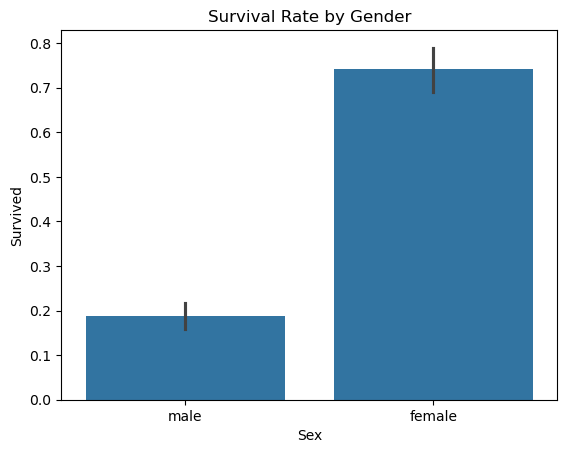

In [22]:
sns.barplot(x='Sex', y='Survived', data=train)
plt.title("Survival Rate by Gender")
plt.show()

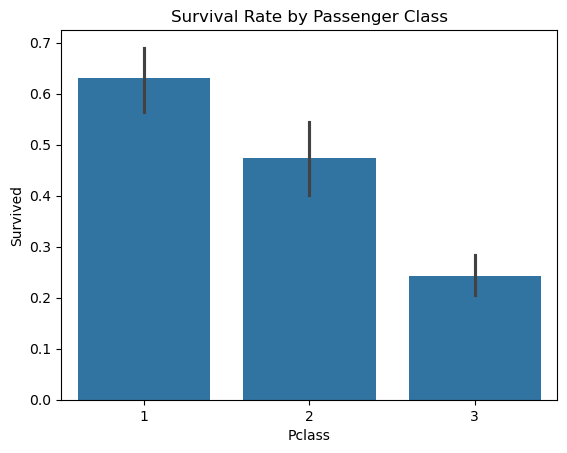

In [24]:
sns.barplot(x='Pclass', y='Survived', data=train)
plt.title("Survival Rate by Passenger Class")
plt.show()

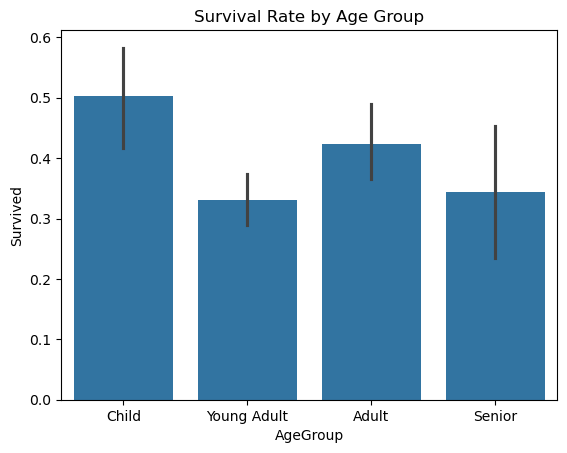

In [26]:
train['AgeGroup'] = pd.cut(train['Age'], bins=[0, 18, 30, 50, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
sns.barplot(x='AgeGroup', y='Survived', data=train)
plt.title("Survival Rate by Age Group")
plt.show()

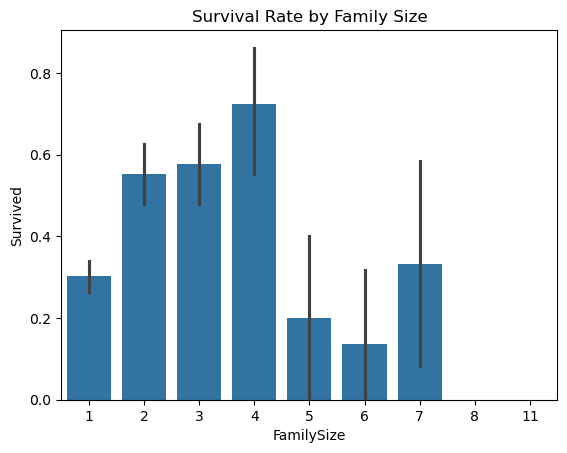

In [28]:
sns.barplot(x='FamilySize', y='Survived', data=train)
plt.title("Survival Rate by Family Size")
plt.show()

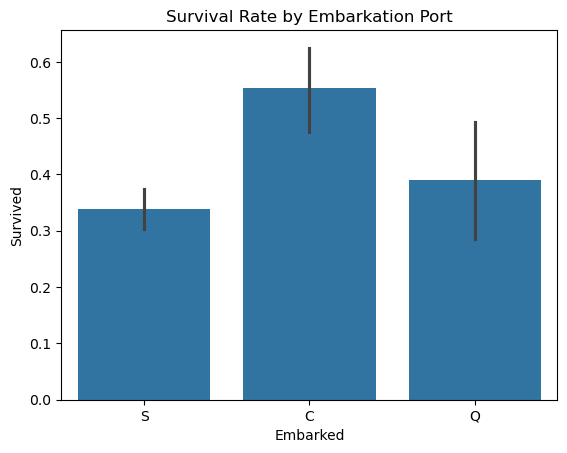

In [30]:
sns.barplot(x='Embarked', y='Survived', data=train)
plt.title("Survival Rate by Embarkation Port")
plt.show()

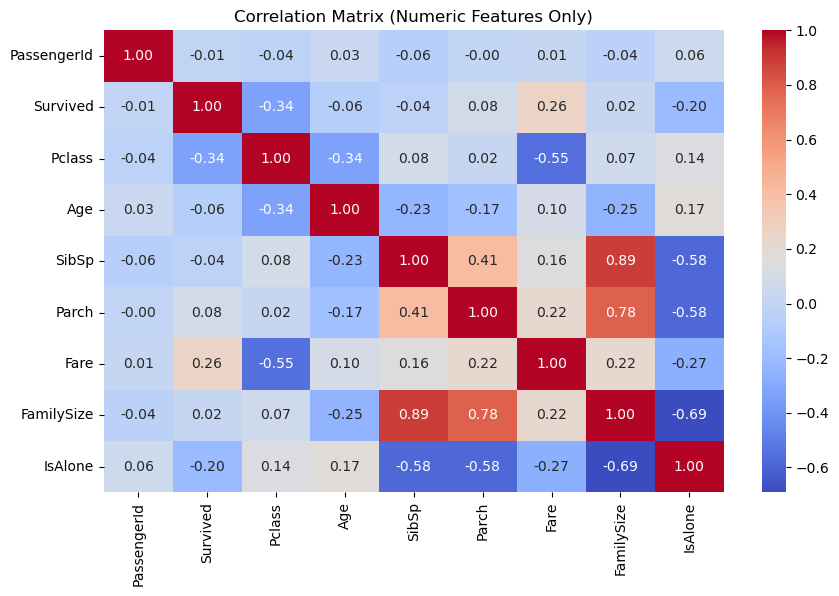

In [44]:

numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = train[numeric_cols].corr()


plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()